In [1]:
# Import Libraries and Dependencies
import matrix_games
from matrix_games.base import*
from matrix_games.generate import*

In [2]:
a = np.array(range(4,25))
print(np.max(a))

24


In [2]:
dimN = 20
dimM = 20
q0 = np.ones(dimN + dimM)
proximal_name = "simplex"

A = create_A("rand", (dimN,dimM))
prob = mg_problem(A, proximal_name)
F_mg, J_mg, _, prox_g_mg = prob.get_parameters()
print(prob)
print(F_mg(q0))

Matrix A: [[0.70036563 0.09806417 0.85963511 0.33914205 0.39955649 0.0039412
  0.59261622 0.77937957 0.47087795 0.89159675 0.63423266 0.58877345
  0.22676087 0.69900318 0.49269427 0.08326927 0.19821773 0.43667372
  0.59236365 0.87274016]
 [0.32569922 0.91725686 0.52698805 0.63320188 0.24826006 0.1470513
  0.51700077 0.97573469 0.98552571 0.85977795 0.40621187 0.44584152
  0.5541624  0.43043036 0.13222355 0.22594162 0.37157586 0.35286283
  0.94025515 0.31861393]
 [0.21166545 0.66652455 0.53173717 0.21716051 0.61512716 0.82201317
  0.38036012 0.22542791 0.78086957 0.72497844 0.64161572 0.67759787
  0.99059316 0.30629244 0.01088494 0.4857554  0.98222846 0.69073607
  0.81651592 0.80067637]
 [0.32453231 0.0709233  0.0816363  0.60128761 0.87011126 0.24458276
  0.24816505 0.98489689 0.54967784 0.15145424 0.97463388 0.91839072
  0.79871767 0.90652847 0.07132521 0.40409103 0.34932616 0.48403107
  0.82394178 0.96574736]
 [0.99885527 0.06551994 0.39196664 0.52576156 0.40136699 0.80613999
  0.0780

Adaptive Graal Implemntation

In [3]:
def adaptive_graal(J, F, prox_g, x1, numb_iter=100, phi=1.5, output=False): 
    begin = perf_counter()
    x, x_ = x1.copy(), x1.copy()
    x0 = x + np.random.randn(x.shape[0]) * 1e-9
    Fx = F(x)
    la = phi / 2 * LA.norm(x - x0) / LA.norm(Fx - F(x0))
    rho = 1. / phi + 1. / phi**2
    values = [J(x)]
    diff = [0]
    time_list = [perf_counter() - begin]
    th = 1

    for i in range(numb_iter):
        x1 = prox_g(x_ - la * Fx, la)
        Fx1 = F(x1)
        if output:
            #print("F: ", Fx1, "\n")
            print("x: ", x1, "\n")
            print("sum: ", sum(x1), "\n")
            print("x>=0: ", np.any((x1 >= 0)))
            #print("prox: ", prox_g(x_ - la * Fx, la), "\n")

        n1 = LA.norm(x1 - x)**2
        n2 = LA.norm(Fx1 - Fx)**2
        n1_div_n2 = n1/n2 if n2 != 0 else la*10

        la1 = min(rho * la, 0.25 * phi * th / la * n1_div_n2)
        x_ = ((phi - 1) * x1 + x_) / phi
        #if output:
            #print (i, la)
        th = phi * la1 / la
        x, la, Fx = x1, la1, Fx1
        #if i%50 == 0: 
            #print("x at iteration ", i , ": ", x)
        temp = values[-1]
        values.append(J(x))
        diff.append(np.absolute(temp - values[-1]))
        time_list.append(perf_counter() - begin)
    end = perf_counter()

    print("CPU time for aGRAAL:", end - begin)
    return values, x, x_, time_list, diff

Solving the VI

In [4]:
N = 20000

# starting point
q0 = np.ones(dimN + dimM)

In [5]:
show_out = False
ans1 = adaptive_graal(J_mg, F_mg, prox_g_mg, q0, numb_iter=N, phi=1.5, output=show_out)

CPU time for aGRAAL: 2.6276979999999996


In [6]:
if show_out:
    print("J(x): " , ans1[0][-1])
    print("x: " ,ans1[1])
    print("diff: ", ans1[4])

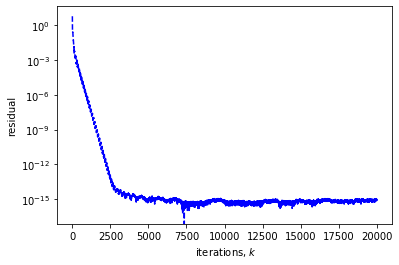

In [7]:
plt.plot(ans1[0], '--b')

plt.yscale('log')

plt.xlabel(u' iterations, $k$')
plt.ylabel(u'residual')

#plt.savefig('figures/nash.pdf', bbox_inches='tight')
plt.show()

In [10]:
print(ans1[0])

[0.09254932533120652, 0.43843037455439143, 0.1954550844905319, 0.19552681875542166, 0.1954839152370465, 0.19543623720892112, 0.1953832845710412, 0.195324476625845, 0.19525916943409444, 0.19518664907059524, 0.19510612421564982, 0.19501671800993037, 0.19491745911148628, 0.19480727189148228, 0.1946849657043329, 0.19454922316818485, 0.19439858739377947, 0.19437626600902513, 0.19479854468340552, 0.19537903914871402, 0.19565123991747047, 0.1956873453510548, 0.19568823051395717, 0.19568823051395712, 0.19568823051395706, 0.1956882305139569, 0.195688230513957, 0.19568823051395712, 0.19568823051395717, 0.195688230513957, 0.19568823051395712, 0.19568823051395717, 0.1956882305139569, 0.19568823051395706, 0.19568823051395706, 0.19568823051395695, 0.19568823051395695, 0.19568823051395717, 0.1956882305139569, 0.19568823051395712, 0.19568823051395695, 0.195688230513958, 0.19568823051395728, 0.19568823051395717, 0.19568823051395717, 0.19568823051395717, 0.19568823051395728, 0.19568823051395717, 0.19568